# Used Car Value

Using Machine Learning to predict the price of a used car based on past data.

* Used car prices depend on the kilometers driven, the age of the car, brand and model along with several other factors.
* Based on past data, a regression model can predict / estimate the value of a used car.

The following code / steps are for developing a Machine Learning model to predict the value of used cars.

The original dataset has been taken from https://www.kaggle.com/orgesleka/used-cars-database

This model can be used for future used car value predictions also, using a similarly formatted dataset.

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV, KFold, cross_val_score
from sklearn.metrics import mean_absolute_error, mean_squared_error
import joblib as jl
from sklearn.linear_model import LinearRegression
# explicitly require this experimental feature for using HistGradientBoostingRegressor
from sklearn.experimental import enable_hist_gradient_boosting
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor, HistGradientBoostingRegressor
from sklearn.svm import SVR
from xgboost import XGBRegressor
from sklearn.metrics import precision_recall_fscore_support

The import statements above are collated as per the requirements of the methods used throughout the notebook

Uncomment the following 2 lines if you choose to execute this notebook in Google Colab

In [3]:
#from google.colab import files
#uploaded = files.upload()

In [4]:
import pandas as pd
auto_df = pd.read_csv("autos.csv")

Looking at the data, most of the features are categorical.
We will have to convert these to numerical values.
We also will have to remove the features which do not have any impact on the price.

In [5]:
auto_df

,dateCrawled,name,seller,offerType,price,abtest,vehicleType,yearOfRegistration,gearbox,powerPS,model,kilometer,monthOfRegistration,fuelType,brand,notRepairedDamage,dateCreated,nrOfPictures,postalCode,lastSeen
0,2016-03-24 11:52:17,Golf_3_1.6,privat,Angebot,480,test,NaN,1993,manuell,0,golf,150000,0,benzin,volkswagen,NaN,2016-03-24 00:00:00,0,70435,2016-04-07 03:16:57
1,2016-03-24 10:58:45,A5_Sportback_2.7_Tdi,privat,Angebot,18300,test,coupe,2011,manuell,190,NaN,125000,5,diesel,audi,ja,2016-03-24 00:00:00,0,66954,2016-04-07 01:46:50
2,2016-03-14 12:52:21,"Jeep_Grand_Cherokee_""Overland""",privat,Angebot,9800,test,suv,2004,automatik,163,grand,125000,8,diesel,jeep,NaN,2016-03-14 00:00:00,0,90480,2016-04-05 12:47:46
3,2016-03-17 16:54:04,GOLF_4_1_4__3TÜRER,privat,Angebot,1500,test,kleinwagen,2001,manuell,75,golf,150000,6,benzin,volkswagen,nein,2016-03-17 00:00:00,0,91074,2016-03-17 17:40:17
4,2016-03-31 17:25:20,Skoda_Fabia_1.4_TDI_PD_Classic,privat,Angebot,3600,test,kleinwagen,2008,manuell,69,fabia,90000,7,diesel,skoda,nein,2016-03-31 00:00:00,0,60437,2016-04-06 10:17:21
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
371523,2016-03-14 17:48:27,Suche_t4___vito_ab_6_sitze,privat,Angebot,2200,test,NaN,2005,NaN,0,NaN,20000,1,NaN,sonstige_autos,NaN,2016-03-14 00:00:00,0,39576,2016-04-06 00:46:52
371524,2016-03-05 19:56:21,Smart_smart_leistungssteigerung_100ps,privat,Angebot,1199,test,cabrio,2000,automatik,101,fortwo,125000,3,benzin,smart,nein,2016-03-05 00:00:00,0,26135,2016-03-11 18:17:12
371525,2016-03-19 18:57:12,Volkswagen_Multivan_T4_TDI_7DC_UY2,privat,Angebot,9200,test,bus,1996,manuell,102,transporter,150000,3,diesel,volkswagen,nein,2016-03-19 00:00:00,0,87439,2016-04-07 07:15:26
371526,2016-03-20 19:41:08,VW_Golf_Kombi_1_9l_TDI,privat,Angebot,3400,test,kombi,2002,manuell,100,golf,150000,6,diesel,volkswagen,NaN,2016-03-20 00:00:00,0,40764,2016-03-24 12:45:21


In [6]:
print(auto_df.shape)

(371528, 20)


In [7]:
auto_df.describe()

,price,yearOfRegistration,powerPS,kilometer,monthOfRegistration,nrOfPictures,postalCode
count,3.715280e+05,371528.000000,371528.000000,371528.000000,371528.000000,371528.0,371528.00000
mean,1.729514e+04,2004.577997,115.549477,125618.688228,5.734445,0.0,50820.66764
std,3.587954e+06,92.866598,192.139578,40112.337051,3.712412,0.0,25799.08247
min,0.000000e+00,1000.000000,0.000000,5000.000000,0.000000,0.0,1067.00000
25%,1.150000e+03,1999.000000,70.000000,125000.000000,3.000000,0.0,30459.00000
50%,2.950000e+03,2003.000000,105.000000,150000.000000,6.000000,0.0,49610.00000
75%,7.200000e+03,2008.000000,150.000000,150000.000000,9.000000,0.0,71546.00000
max,2.147484e+09,9999.000000,20000.000000,150000.000000,12.000000,0.0,99998.00000


As can be seen above, some values are erroneous.

For example:

min yearOfRegistration: 1000 or max yearOfRegistration: 9999

min price: 0 or max price: 2.14x10^9

min powerPS: 0 or max powerPS: 20000

In [8]:
auto_df.columns

Index(['dateCrawled', 'name', 'seller', 'offerType', 'price', 'abtest',
       'vehicleType', 'yearOfRegistration', 'gearbox', 'powerPS', 'model',
       'kilometer', 'monthOfRegistration', 'fuelType', 'brand',
       'notRepairedDamage', 'dateCreated', 'nrOfPictures', 'postalCode',
       'lastSeen'],
      dtype='object')

In [9]:
print("Number of records: ", len(auto_df))

Number of records:  371528


### Cleaning data
*  Removing unwanted records / outliers
*  Removing records of vehicles that are too old (older than 1999).
*  Removing records having invalid (future) date.
*  Removing records with too low a price.

In [10]:
# Ignoring cars older than year 2000 and future dates/invalid dates and 
# those with too low a price
auto_df = auto_df.where((auto_df['yearOfRegistration'] > 1999) & 
                        (auto_df['yearOfRegistration'] < 2020) & 
                        (auto_df['price'] > 20)).dropna()


In [11]:
print(auto_df['yearOfRegistration'].describe())

count    192173.000000
mean       2006.109152
std           3.993939
min        2000.000000
25%        2003.000000
50%        2006.000000
75%        2009.000000
max        2018.000000
Name: yearOfRegistration, dtype: float64


#### Removing records having likely incorrect price


In [12]:
# Removing records having likely incorrect price
indexNames = auto_df[ auto_df['price'] == 11111111.0	 ].index
auto_df.drop(indexNames , inplace=True)
indexNames = auto_df[ auto_df['price'] == 12345678.0	 ].index
auto_df.drop(indexNames , inplace=True)
indexNames = auto_df[ auto_df['price'] == 999999.0	 ].index
auto_df.drop(indexNames , inplace=True)
indexNames = auto_df[ auto_df['price'] == 9999999.0	 ].index
auto_df.drop(indexNames , inplace=True)
indexNames = auto_df[ auto_df['price'] >= 2000000.0	 ].index
auto_df.drop(indexNames , inplace=True)

In [13]:
print(auto_df['price'].describe())

count    1.921660e+05
mean     8.228548e+03
std      1.096402e+04
min      2.500000e+01
25%      2.700000e+03
50%      5.500000e+03
75%      1.050000e+04
max      1.250000e+06
Name: price, dtype: float64


In [14]:
print("Number of Records: ", len(auto_df))

Number of Records:  192166


In [15]:
print(auto_df.dtypes)

dateCrawled             object
name                    object
seller                  object
offerType               object
price                  float64
abtest                  object
vehicleType             object
yearOfRegistration     float64
gearbox                 object
powerPS                float64
model                   object
kilometer              float64
monthOfRegistration    float64
fuelType                object
brand                   object
notRepairedDamage       object
dateCreated             object
nrOfPictures           float64
postalCode             float64
lastSeen                object
dtype: object


In [16]:
# Converting float types to int
auto_df["price"] = auto_df["price"].astype(int)
auto_df["powerPS"] = auto_df["powerPS"].astype(int)
auto_df["kilometer"] = auto_df["kilometer"].astype(int)
auto_df["yearOfRegistration"] = auto_df["yearOfRegistration"].astype(int)
auto_df["monthOfRegistration"] = auto_df["monthOfRegistration"].astype(int)

In [17]:
print(auto_df.dtypes)

dateCrawled             object
name                    object
seller                  object
offerType               object
price                    int64
abtest                  object
vehicleType             object
yearOfRegistration       int64
gearbox                 object
powerPS                  int64
model                   object
kilometer                int64
monthOfRegistration      int64
fuelType                object
brand                   object
notRepairedDamage       object
dateCreated             object
nrOfPictures           float64
postalCode             float64
lastSeen                object
dtype: object


### Feature Engineering
* Converting **yeafOfRegistration** and **monthOfRegistration** to a new feature **age**
* Creating new feature **name_len** from the existing feature **name**

In [18]:
# function that returns calculates and returns the age of the vehicle.
def age_calculator(df):
    # Setting monthOfRegistration having value 0 to January (1)
    df["monthOfRegistration"].replace({0: 1}, inplace=True)
    
    # Creating feature dateOfRegistration from yearOfRegistration and monthOfRegistration
    df["dateOfRegistration"] = df["yearOfRegistration"].astype(str) + df["monthOfRegistration"].astype(str) + "1"
    
    # Converting dateOfRegistration to date format
    df['dateOfRegistration'] = pd.to_datetime(df['dateOfRegistration'], 
                                               format='%Y%m%d')
    # Calculating age and creating age feature from dateOfRegistration
    from datetime import datetime
    from datetime import date
    def calculate_age(dt):
        today = date.today()
        return today.year - dt.year - ((today.month, today.day) < (dt.month, dt.day))
    
    # Creating a new feature "age" based on dateOfRegistration
    return df['dateOfRegistration'].apply(calculate_age)

auto_df['age'] = age_calculator(auto_df)


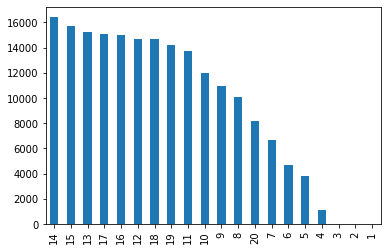

In [19]:
# Count of cars based on the year of registration (to further narrow the data set)
auto_df['age'].value_counts()[:28].plot(kind='bar')

In [20]:
auto_df['age'].describe()

count    192166.000000
mean         13.434255
std           4.019765
min           1.000000
25%          10.000000
50%          14.000000
75%          17.000000
max          20.000000
Name: age, dtype: float64

In [21]:
auto_df.isnull().sum()

dateCrawled            0
name                   0
seller                 0
offerType              0
price                  0
abtest                 0
vehicleType            0
yearOfRegistration     0
gearbox                0
powerPS                0
model                  0
kilometer              0
monthOfRegistration    0
fuelType               0
brand                  0
notRepairedDamage      0
dateCreated            0
nrOfPictures           0
postalCode             0
lastSeen               0
dateOfRegistration     0
age                    0
dtype: int64

In [22]:
print(len(auto_df["name"].unique()))

107792


The name feature has too many unique records and thus does not have any bearing on the price.
But the length of the name could have some correlation with price given that longer name length indicates more features.

In [23]:
auto_df['name_len'] = auto_df['name'].str.len()
print(auto_df['name_len'].unique())

[   18    30    27    17    45    65    32    33    55    37    14    13
    41    34    12    28    20    26    23    15    42    46    11    43
    22    54    62    36    16    25    48    60    31    29    51    19
    63    21    53    49    50    44    52    35    59    24    39    40
     8    56    10    47    61    38     7    64    58    57    66     9
     6    67    68 20474     4]


In [24]:
# removing outlier with too long name length.
indexNames = auto_df[auto_df['name_len'] >= 200].index
auto_df.drop(indexNames , inplace=True)
print(auto_df['name_len'].unique())

[18 30 27 17 45 65 32 33 55 37 14 13 41 34 12 28 20 26 23 15 42 46 11 43
 22 54 62 36 16 25 48 60 31 29 51 19 63 21 53 49 50 44 52 35 59 24 39 40
  8 56 10 47 61 38  7 64 58 57 66  9  6 67 68  4]


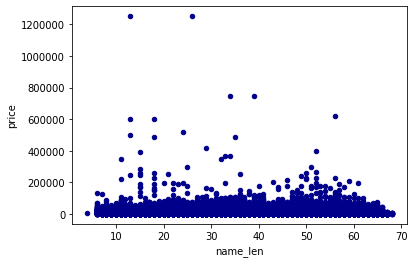

In [25]:
auto_df.plot.scatter(x='name_len', y='price', c='DarkBlue')

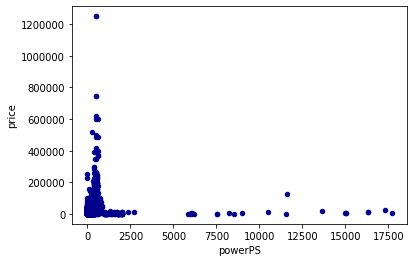

In [26]:
# plotting the price of the vehicle against the powerPS
auto_df.plot.scatter(x='powerPS', y='price', c='DarkBlue')

We see there are many invalid entries for powerPS (either too high or too low)

In [27]:
print("Number of rows having power > 600: ", len(auto_df.where(auto_df.powerPS > 600).dropna()))
print("Number of rows having power < 30: ", len(auto_df.where(auto_df.powerPS < 30).dropna()))

Number of rows having power > 600:  136
Number of rows having power < 30:  5319


In [28]:
# Removing records with invalid powerPS values (>= 600 or < 30)
indexNames = auto_df[ auto_df['powerPS'] >= 600 ].index
auto_df.drop(indexNames , inplace=True)
indexNames = auto_df[ auto_df['powerPS'] < 30 ].index
auto_df.drop(indexNames , inplace=True)

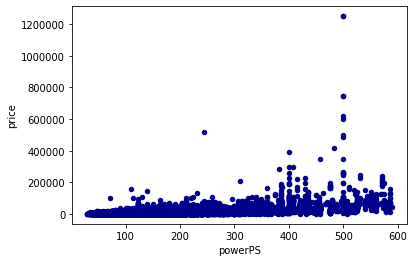

In [29]:
auto_df.plot.scatter(x='powerPS', y='price', c='DarkBlue')

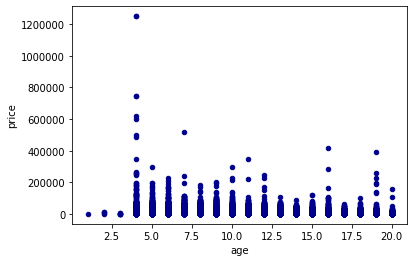

In [30]:
# plotting price of used car against the age
auto_df.plot.scatter(x='age', y='price', c='DarkBlue')

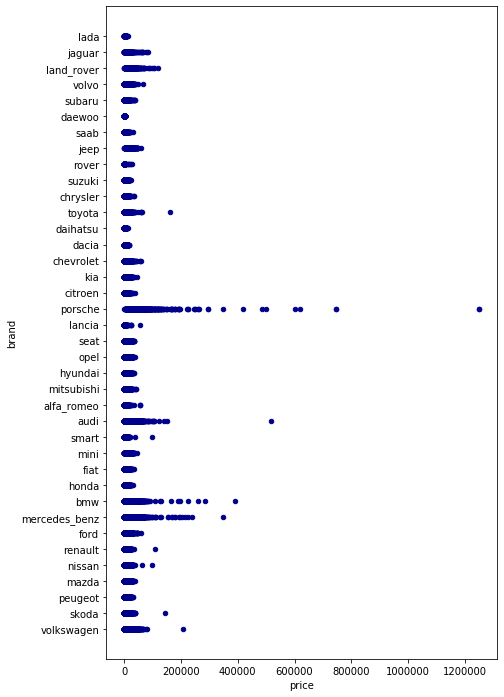

In [31]:
# plotting price of used car against the brand
auto_df.plot.scatter(x='price', y='brand', c='DarkBlue', figsize=(7, 12))

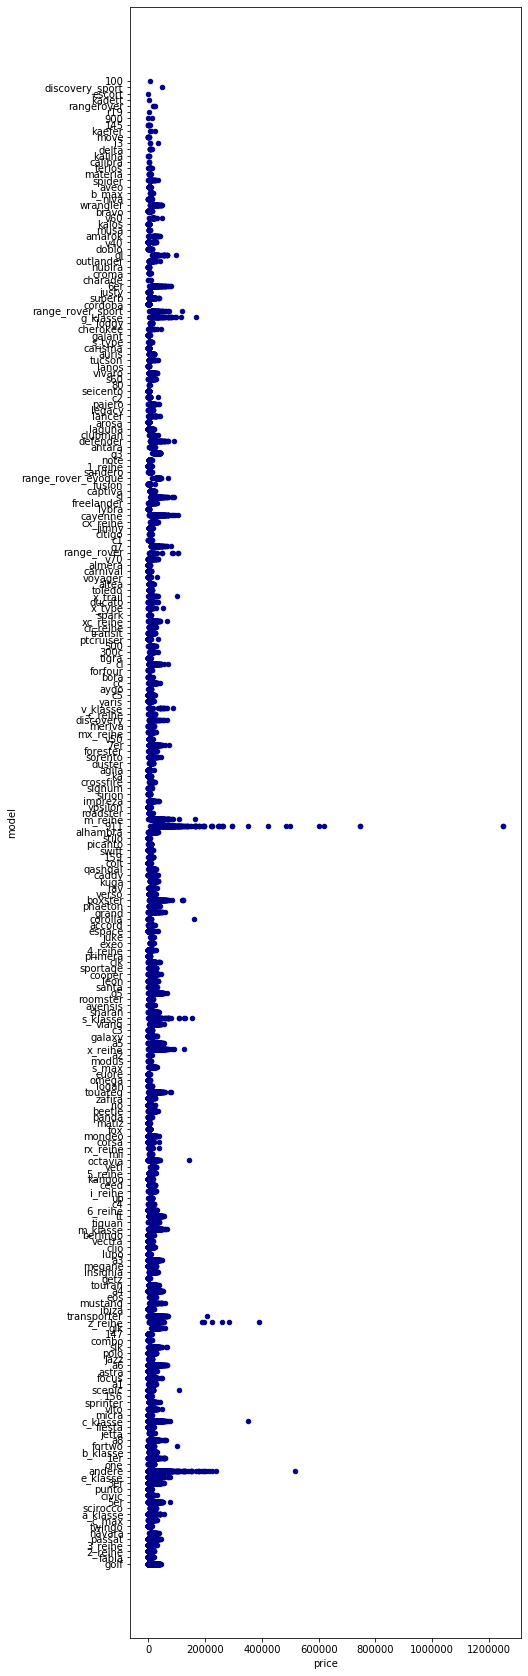

In [32]:
# plotting the price of used car against the model
auto_df.plot.scatter(x='price', y='model', c='DarkBlue', figsize=(7, 30))

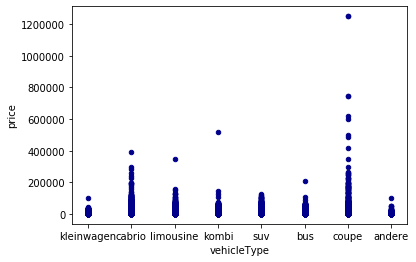

In [33]:
# plotting price of used car against the vehicleType
auto_df.plot.scatter(x='vehicleType', y='price', c='DarkBlue')

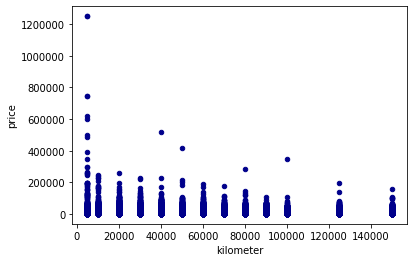

In [34]:
# plotting price of used car against the kilometer
auto_df.plot.scatter(x='kilometer', y='price', c='DarkBlue')

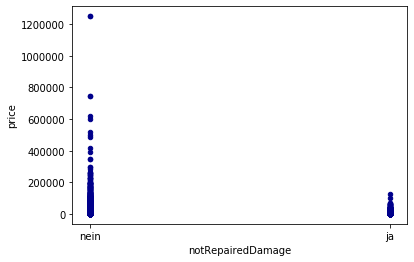

In [35]:
# plotting price of used car against the notRepairedDamage
auto_df.plot.scatter(x='notRepairedDamage', y='price', c='DarkBlue')

As can be seen from above plots, the following features do have some impact on the price of the car.

notRepairedDamage (nien or no means the price is likely to be higher)

Lesser kilometer driven fetches more price

vehicleType also has an affect on the price - coupes are generally costlier

model also has some impact on price - 911's are generally costlier

brand also has slight correlation with price - Mercedes, BMWs and Porsche are usually costlier than Nissan

age also has a bearing on the price. Older the car cheaper it is.

powerPS has strong correlation to price

name_len also has some bearing on the price as is evident from the plot.


In [36]:
# Following columns have no bearing on the price.
print(auto_df.offerType.unique())
print(auto_df.seller.unique())
print(auto_df.abtest.unique())
print(auto_df.nrOfPictures.unique())

['Angebot' 'Gesuch']
['privat' 'gewerblich']
['test' 'control']
[0.]


In [37]:
print(auto_df.offerType.value_counts())

Angebot    186703
Gesuch          1
Name: offerType, dtype: int64


In [38]:
print(auto_df.seller.value_counts())

privat        186703
gewerblich         1
Name: seller, dtype: int64


In [39]:
print(auto_df.abtest.value_counts())

test       96748
control    89956
Name: abtest, dtype: int64


In [40]:
print(auto_df.nrOfPictures.value_counts())

0.0    186704
Name: nrOfPictures, dtype: int64


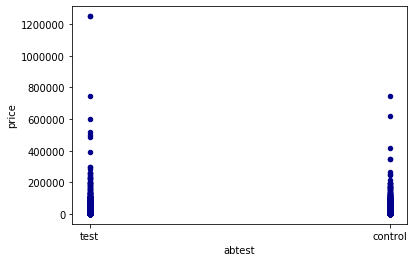

In [41]:
auto_df.plot.scatter(x='abtest', y='price', c='DarkBlue')

offerType has only two values and there is only 1 record having value Gesuch.

Hence this feature can be dropped

seller also has only 2 values and only 1 record having value gewerblich.

Hence I will drop this feature also

nrOfPictures has only 1 value (0.0) and is thus of no use.

I will drop this too. 

Abtest has two values  (test and control) and they are almost similar in count.

Moreover, from the plot, we can see the price range is equally distributed across two values of abtest (except for an outlier).

Hence this might be of importance as well, so I will drop this feature as well.


### Encoding

Mapping and replacing the categorical values with numbers

In [42]:
# Replacing fuel types with numerals
auto_df['fuelType'].unique()
auto_df_fuelType_dic = dict(zip(list(auto_df['fuelType'].unique()), list(range(1, len(auto_df['fuelType'].unique())+1))))
auto_df["fuelType"].replace(auto_df_fuelType_dic, inplace=True)

{'benzin': 1, 'diesel': 2, 'lpg': 3, 'andere': 4, 'hybrid': 5, 'cng': 6, 'elektro': 7}


In [43]:
# Replacing gearbox and notRepairedDamage with numerals
auto_df["gearbox"].replace({"manuell": 1, "automatik": 2}, inplace=True)
auto_df["notRepairedDamage"].replace({"ja": 1, "nein": 2}, inplace=True)

In [44]:
# Replacing brand by numbers
auto_df_brand_dic = dict(zip(list(auto_df['brand'].unique()), list(range(1, len(auto_df['brand'].unique())+1))))
auto_df["brand"].replace(auto_df_brand_dic, inplace=True)

# Replacing model with numbers
auto_df_models_dic = dict(zip(list(auto_df['model'].unique()), list(range(1, len(auto_df['model'].unique())+1))))
auto_df["model"].replace(auto_df_models_dic, inplace=True)

# Replacing vehicleType by numbers
auto_vehicleType_dic = dict(zip(list(auto_df['vehicleType'].unique()), list(range(1, len(auto_df['vehicleType'].unique())+1))))
auto_df["vehicleType"].replace(auto_vehicleType_dic, inplace=True)

In [79]:
# Mapping of categorical values and corresponding numbers
print("fuelTypes Mapping: ", auto_df_fuelType_dic)
print("\ngearbox mapping: {manuell: 1, automatik: 2}")
print("\nnotRepairedDamage: {ja: 1, nein: 2}")
print("\nbrand", auto_df_brand_dic)
print("\nmodel", auto_df_models_dic)
print("\nvehicleType", auto_vehicleType_dic)

fuelTypes Mapping:  {'benzin': 1, 'diesel': 2, 'lpg': 3, 'andere': 4, 'hybrid': 5, 'cng': 6, 'elektro': 7}

gearbox mapping: {manuell: 1, automatik: 2}

notRepairedDamage: {ja: 1, nein: 2}

brand {'volkswagen': 1, 'skoda': 2, 'peugeot': 3, 'mazda': 4, 'nissan': 5, 'renault': 6, 'ford': 7, 'mercedes_benz': 8, 'bmw': 9, 'honda': 10, 'fiat': 11, 'mini': 12, 'smart': 13, 'audi': 14, 'alfa_romeo': 15, 'mitsubishi': 16, 'hyundai': 17, 'opel': 18, 'seat': 19, 'lancia': 20, 'porsche': 21, 'citroen': 22, 'kia': 23, 'chevrolet': 24, 'dacia': 25, 'daihatsu': 26, 'toyota': 27, 'chrysler': 28, 'suzuki': 29, 'rover': 30, 'jeep': 31, 'saab': 32, 'daewoo': 33, 'subaru': 34, 'volvo': 35, 'land_rover': 36, 'jaguar': 37, 'lada': 38}

model {'golf': 1, 'fabia': 2, '2_reihe': 3, '3_reihe': 4, 'passat': 5, 'navara': 6, 'twingo': 7, 'c_max': 8, 'a_klasse': 9, 'scirocco': 10, '5er': 11, 'civic': 12, 'punto': 13, '3er': 14, 'e_klasse': 15, 'andere': 16, 'one': 17, '1er': 18, 'b_klasse': 19, 'fortwo': 20, 'a8':

### Feature selection
Dropping features which do not have any impact on the price

In [45]:
print(auto_df.columns)

Index(['dateCrawled', 'name', 'seller', 'offerType', 'price', 'abtest',
       'vehicleType', 'yearOfRegistration', 'gearbox', 'powerPS', 'model',
       'kilometer', 'monthOfRegistration', 'fuelType', 'brand',
       'notRepairedDamage', 'dateCreated', 'nrOfPictures', 'postalCode',
       'lastSeen', 'dateOfRegistration', 'age', 'name_len'],
      dtype='object')


In [46]:
# Dropping features which don't have any correlation to the price
# or are redundant due to feature engineering done earlier
auto_df.drop(['dateCrawled',
              'name',
              'seller', 
              'offerType', 
              'abtest',
              'nrOfPictures',
              'lastSeen',
              'dateCreated',
              'postalCode',
              'yearOfRegistration',
              'monthOfRegistration',
              'dateOfRegistration'], axis='columns', inplace=True)

In [47]:
print(auto_df.columns)

Index(['price', 'vehicleType', 'gearbox', 'powerPS', 'model', 'kilometer',
       'fuelType', 'brand', 'notRepairedDamage', 'age', 'name_len'],
      dtype='object')


In [48]:
print("Number of records: ", len(auto_df))

Number of records:  186704


In [49]:
# Checking for NaN values in the data
print(auto_df.isna().sum())

price                0
vehicleType          0
gearbox              0
powerPS              0
model                0
kilometer            0
fuelType             0
brand                0
notRepairedDamage    0
age                  0
name_len             0
dtype: int64


In [50]:
print(auto_df.dtypes)

price                int64
vehicleType          int64
gearbox              int64
powerPS              int64
model                int64
kilometer            int64
fuelType             int64
brand                int64
notRepairedDamage    int64
age                  int64
name_len             int64
dtype: object


#### Plotting the correlations

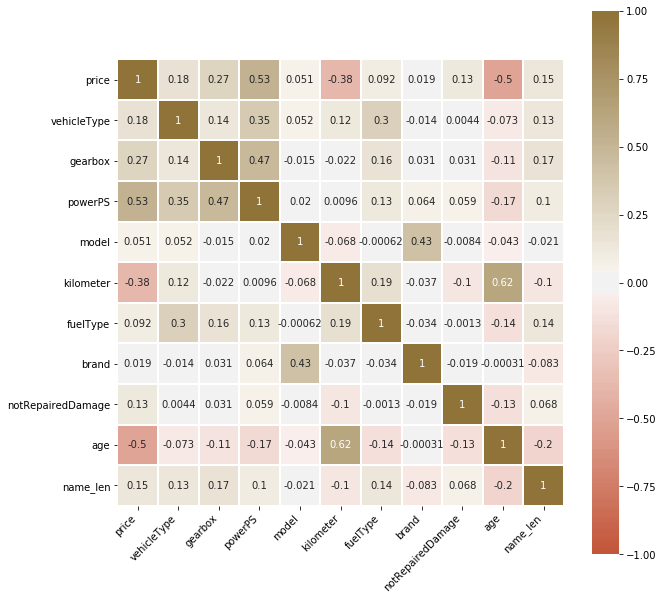

In [51]:
# Visualizing the correlation heatmap
corr = auto_df.corr()
plt.figure(figsize = (10,10))
ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 420, n=200),
    square=True,
    linewidths=1,
    annot=True,
    linecolor='White',
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);

As we can see above, there is no strong correlation between the features

Given below is the correlation histogram of each feature with price.

Correlation of features with price:
 powerPS              0.526949
age                  0.502717
kilometer            0.383769
gearbox              0.273475
vehicleType          0.179705
name_len             0.147163
notRepairedDamage    0.128816
fuelType             0.091846
model                0.051018
brand                0.019245
Name: price, dtype: float64


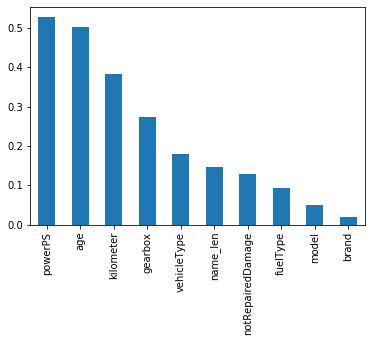

In [52]:
print("Correlation of features with price:\n", 
      auto_df.corr().loc[:,'price'].abs().sort_values(ascending=False)[1:])
auto_df.corr().loc[:,'price'].abs().sort_values(ascending=False)[1:].plot.bar()

### Modelling (Using Linear regression to set the baseline)

To guage the baseline, I will try Linear Regression with reduced feature set.

I will include **powerPS**, **age**, **kilometer**, **gearbox**, **vehicleType** and **name_len**

In [53]:
# Assigning input features in variable X and Target (price) in Y
X = auto_df.drop(['price', 'brand', 'model', 'fuelType', 'notRepairedDamage', ],
                 axis='columns', inplace = False)
Y = auto_df["price"]

### Feature Scaling
Given the large variation in Price, I am using logarithm (log1p function) to normalise the Price values

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a260ff510>,
      dtype=object)

<Figure size 720x288 with 0 Axes>

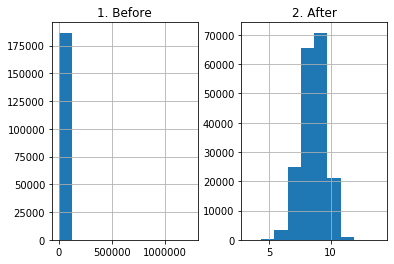

In [54]:
# Normalizing the price range by taking a log of price values
Y = np.log1p(Y)

plt.figure(figsize=(10, 4))
prices = pd.DataFrame({"1. Before":auto_df['price'], "2. After":Y})
prices.hist()

In [55]:
Y.describe()

count    186704.000000
mean          8.584688
std           0.970189
min           3.258097
25%           7.937375
50%           8.630700
75%           9.287394
max          14.038655
Name: price, dtype: float64

### Training the base model (using Linear Regression)

Using this step, I will assess whether to include all the features we have shortlisted or only a reduced feature set is sufficient to build a viable model

In [56]:
# Splitting the dataset into Training dataset and Test Dataset
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.3)

# Trying Linear Regression model 
lr_model = LinearRegression()
lr_model.fit(X_train, Y_train)
print("R2_Score for Training data: ", lr_model.score(X_train, Y_train))
print("R2_Score for Test data: ", lr_model.score(X_test, Y_test))

R2_Score for Training data:  0.75785009391781
R2_Score for Test data:  0.7596221278679398


Using Linear Regression again by including additional features that we dropped before. i.e. **brand**, **model**, **fuelType**, **notRepairedDamage**

In [57]:
# Assigning input features in variable X and Target (price) in Y
X = auto_df.drop(['price'], axis='columns', inplace = False)
Y = auto_df['price']
# Normalizing the price range by taking a log of price values
Y = np.log1p(Y)

In [58]:
# Splitting the dataset into Training dataset and Test Dataset
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.3)

lr_model = LinearRegression()
lr_model.fit(X_train, Y_train)
print("R2_Score for Training data: ", lr_model.score(X_train, Y_train))
print("R2_Score for Test data: ", lr_model.score(X_test, Y_test))

R2_Score for Training data:  0.7909652027345377
R2_Score for Test data:  0.7905543088949134


### Model Selection
We see above that including more features improved the score.

Hence we will proceed with the below feature set as final and use **KFold Cross Validation** technique to choose a better regression algorithm.

*   powerPS
*   age
*   kilometer
*   gearbox
*   vehicleType
*   name_len
*   notRepairedDamage
*   fuelType
*   model
*   brand

In [59]:
models = []
models.append(('LR', LinearRegression()))
models.append(('HGBR', HistGradientBoostingRegressor()))
models.append(('GBR', GradientBoostingRegressor()))
models.append(('RFR', RandomForestRegressor()))
models.append(('XGBR', XGBRegressor(objective='reg:squarederror')))
# for XGBRegressor, we have to use the package xgboost and that must be 
# installed when we install sklearn and other packages

In [60]:
print(models)

[('LR', LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)), ('HGBR', HistGradientBoostingRegressor(l2_regularization=0.0, learning_rate=0.1,
                              loss='least_squares', max_bins=255,
                              max_depth=None, max_iter=100, max_leaf_nodes=31,
                              min_samples_leaf=20, n_iter_no_change=None,
                              random_state=None, scoring=None, tol=1e-07,
                              validation_fraction=0.1, verbose=0,
                              warm_start=False)), ('GBR', GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0, criterion='friedman_mse',
                          init=None, learning_rate=0.1, loss='ls', max_depth=3,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fracti

In [61]:
# Using K-Fold Cross-Validation to determine the performance of different algorithms
results = []
for name, model in models:
    cv_results = cross_val_score(model, X_train, Y_train, cv=KFold(n_splits=10))
    results.append(cv_results)
    print("%s: Mean %f, Standard Deviation (%f)" % (name, cv_results.mean(), cv_results.std()))

LR: Mean 0.790949, Standard Deviation (0.007257)
HGBR: Mean 0.882182, Standard Deviation (0.005255)
GBR: Mean 0.859584, Standard Deviation (0.005499)
RFR: Mean 0.881588, Standard Deviation (0.004350)
XGBR: Mean 0.859320, Standard Deviation (0.005434)


We will try Linear Regression first to get the base model and plot some visualizations.

In [62]:
lr_model = LinearRegression()
lr_model.fit(X_train, Y_train)
print("R2_Score for Training data: ", lr_model.score(X_train, Y_train))
print("R2_Score for Test data: ", lr_model.score(X_test, Y_test))

R2_Score for Training data:  0.7909652027345377
R2_Score for Test data:  0.7905543088949134


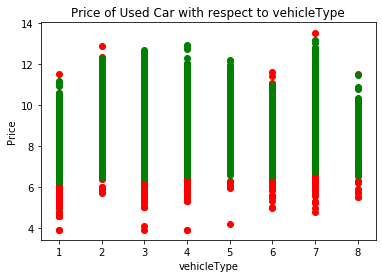

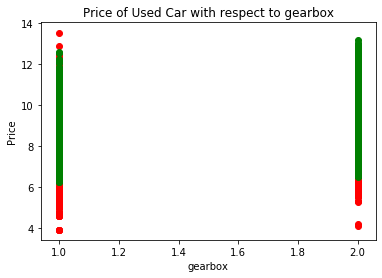

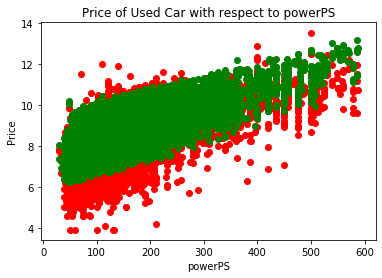

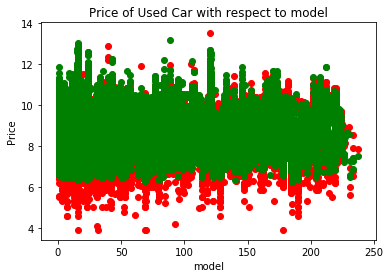

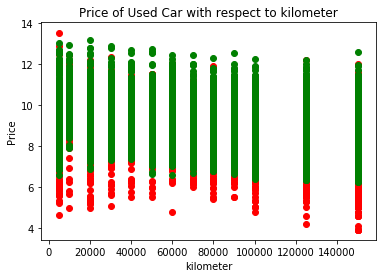

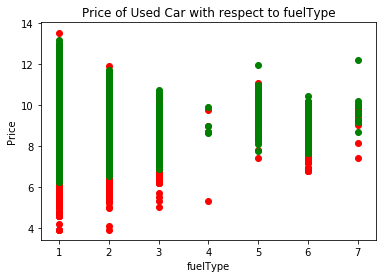

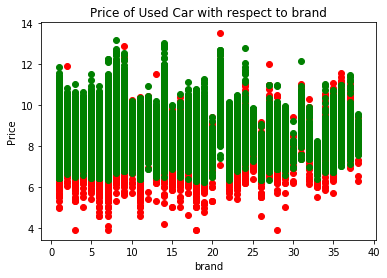

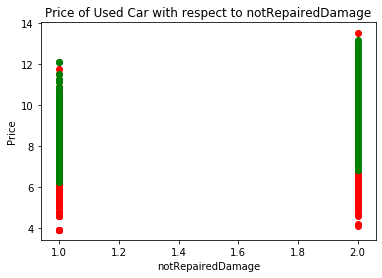

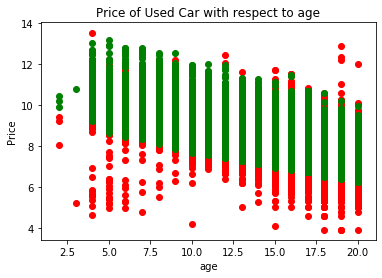

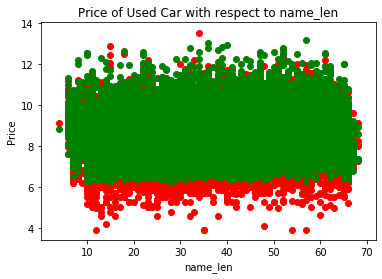

In [63]:
# plotting the predicted values vs actual values with respect to 
# different features in test dataset

for i in X_train.columns:
    plt.scatter(X_test[i], Y_test, color = "red")
    plt.scatter(X_test[i], lr_model.predict(X_test), color = "green")
    plt.title("Price of Used Car with respect to " + i)
    plt.xlabel(i)
    plt.ylabel('Price')
    plt.show()

As can be gleaned from these plots, Linear regression does an OK job of predicting the Used car price, but as indicated by KFold Cross Validation, we see other algorithms produce better score.

### GridSearchCV for selecting best Hyper Parameters

So I will use **HistGradientBoostingRegressor** because of better cv score and try to arrive at better parameters using GridSearchCV

In [64]:
model_hist_gbr = HistGradientBoostingRegressor()
param_grid = {
    'max_iter': [1500, 2500, 3500],
    'min_samples_leaf': [20, 40],
    'learning_rate': [0.05, 0.1, 1]
}
gs_cv = GridSearchCV(model_hist_gbr, param_grid, n_jobs=6)


In [65]:
gs_cv.fit(X_train, Y_train)
print(gs_cv.best_params_)

{'learning_rate': 0.05, 'max_iter': 3500, 'min_samples_leaf': 20}


In [66]:
print(gs_cv.best_estimator_)

HistGradientBoostingRegressor(l2_regularization=0.0, learning_rate=0.05,
                              loss='least_squares', max_bins=255,
                              max_depth=None, max_iter=3500, max_leaf_nodes=31,
                              min_samples_leaf=20, n_iter_no_change=None,
                              random_state=None, scoring=None, tol=1e-07,
                              validation_fraction=0.1, verbose=0,
                              warm_start=False)


In [67]:
mae_HGB_train = mean_absolute_error(Y_train, gs_cv.predict(X_train))
print("HistGradientBoosting Training set Mean Absolute Error: %.4f" % mae_HGB_train)
rmse_HGB_train = mean_squared_error(Y_train, gs_cv.predict(X_train))
print("HistGradientBoosting Training set Mean Squared Error: %.4f" % rmse_HGB_train)
mae_HGB_test = mean_absolute_error(Y_test, gs_cv.predict(X_test))
print("HistGradientBoosting Test set Mean Absolute Error: %.4f" % mae_HGB_test)
rmse_HGB_test = mean_squared_error(Y_test, gs_cv.predict(X_test))
print("HistGradientBoosting Test set Mean squared Error: %.4f" % rmse_HGB_test)
print("HistGradientBoosting Training Set Score: ", gs_cv.score(X_train, Y_train))
print("HistGradientBoosting Test Set Score: ", gs_cv.score(X_test, Y_test))

HistGradientBoosting Training set Mean Absolute Error: 0.1829
HistGradientBoosting Training set Mean Squared Error: 0.0689
HistGradientBoosting Test set Mean Absolute Error: 0.2076
HistGradientBoosting Test set Mean squared Error: 0.0965
HistGradientBoosting Training Set Score:  0.926761528682737
HistGradientBoosting Test Set Score:  0.8974524356765066


## Results / Analysis

### Predicted Price vs Actual Price

In [68]:
print(len(X_test))

56012


The test data has 56012 rows.

Hence I will try to plot random 200 records, first 200 records as well as last 200 records

Text(0, 0.5, 'price - log1p value')

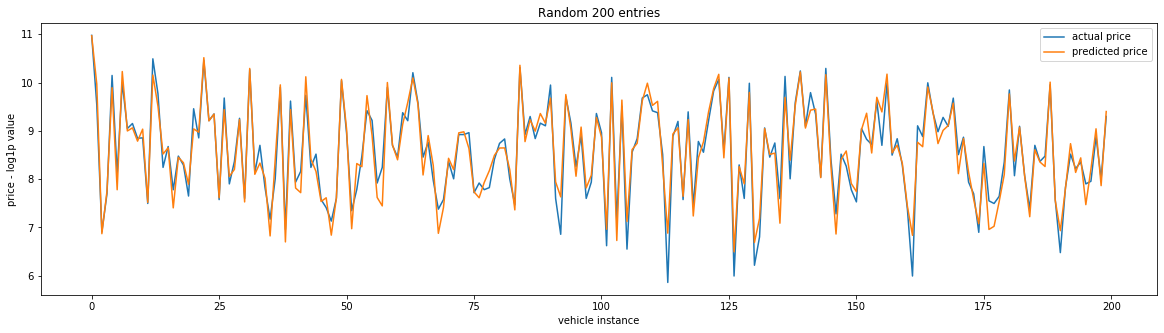

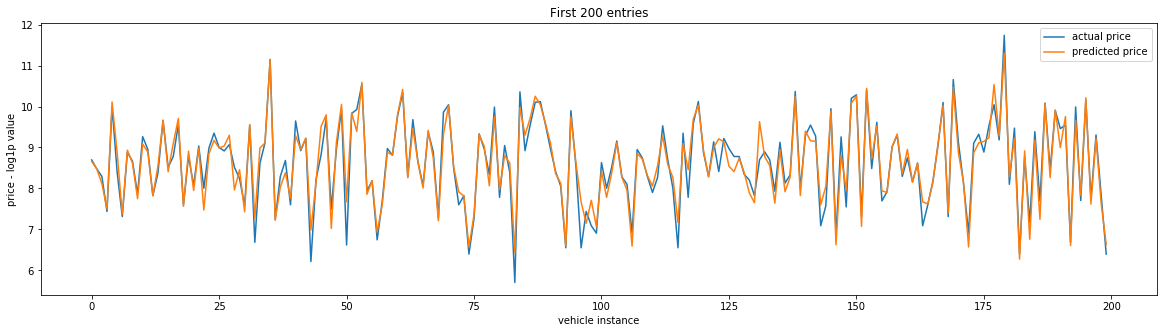

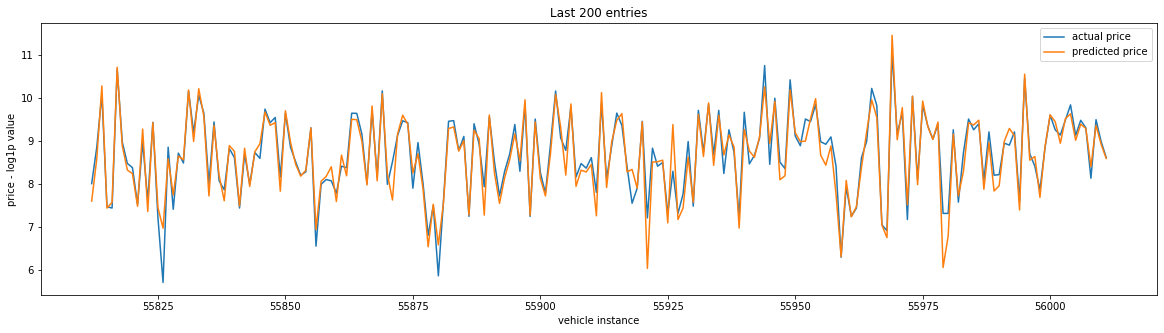

In [69]:
# Comparison chart of predicted price (orange) vs actual listed price (blue)
Original_price = Y_test.reset_index(drop=True)
Predicted_price = pd.Series(gs_cv.predict(X_test)).reset_index(drop=True)
compare_df = pd.concat(
    [Original_price, Predicted_price], axis=1).rename(
    columns={'price': 'actual price', 0:'predicted price'})

# plotting random 200 entries
ax = compare_df.sample(n=200).reset_index(drop=True).plot(title="Random 200 entries", figsize=(20,5))
ax.set_xlabel("vehicle instance")
ax.set_ylabel("price - log1p value")

# plotting first 200 entries
ax = compare_df.head(n=200).plot(title="First 200 entries", figsize=(20,5))
ax.set_xlabel("vehicle instance")
ax.set_ylabel("price - log1p value")

# plotting last 200 entries
ax = compare_df.tail(n=200).plot(title="Last 200 entries", figsize=(20,5))
ax.set_xlabel("vehicle instance")
ax.set_ylabel("price - log1p value")

Text(0, 0.5, 'price - log1p value')

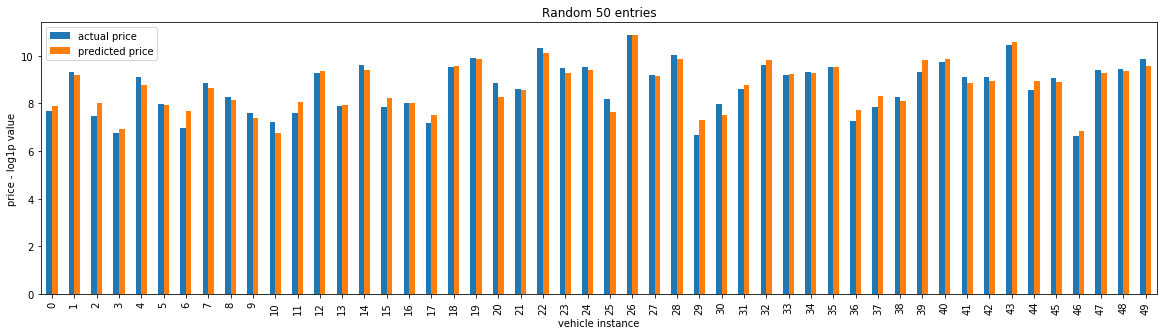

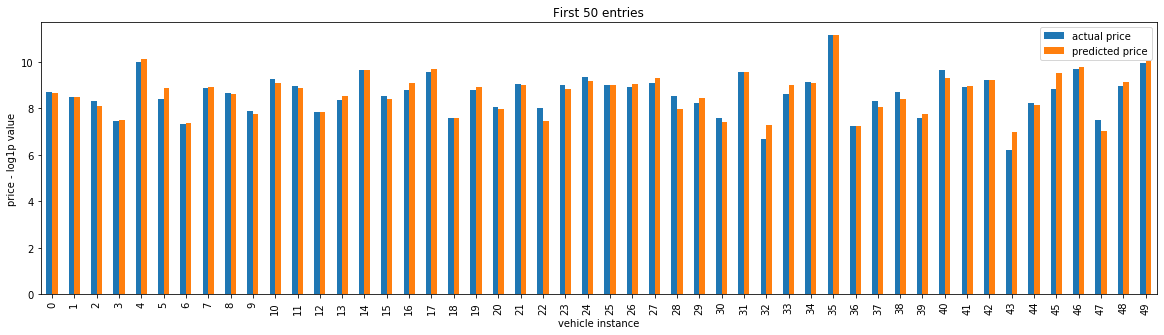

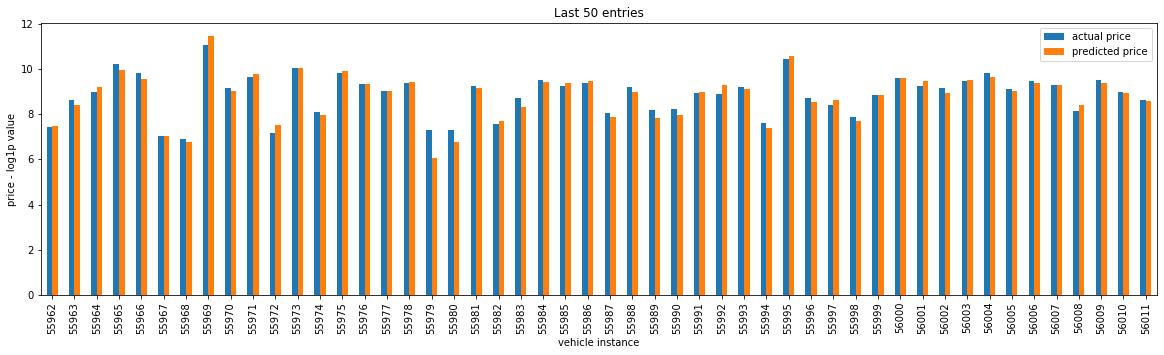

In [70]:
# plotting random 50 entries
ax = compare_df.sample(n=50).reset_index(drop=True).plot.bar(title="Random 50 entries", figsize=(20,5))
ax.set_xlabel("vehicle instance")
ax.set_ylabel("price - log1p value")

# plotting first 50 entries
ax = compare_df.head(n=50).plot.bar(title="First 50 entries", figsize=(20,5))
ax.set_xlabel("vehicle instance")
ax.set_ylabel("price - log1p value")

# plotting last 50 entries
ax = compare_df.tail(n=50).plot.bar(title="Last 50 entries", figsize=(20,5))
ax.set_xlabel("vehicle instance")
ax.set_ylabel("price - log1p value")

As indicated by above plots, this model produced by HistGradientBoostingRegressor provides a much better fit, and the predicted Used car prices closely match the actual listed prices in the test data.

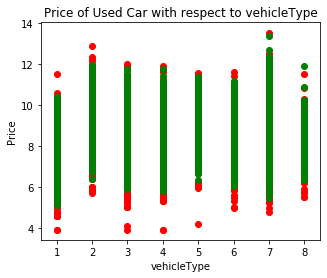

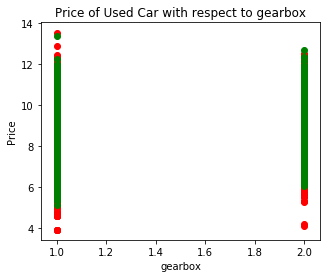

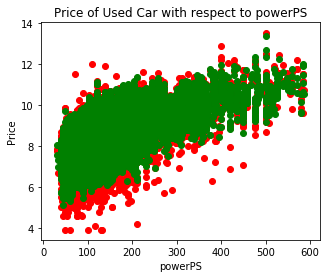

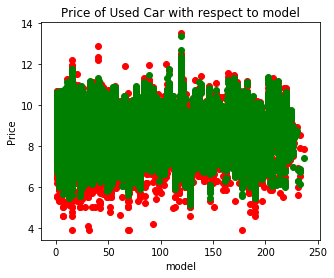

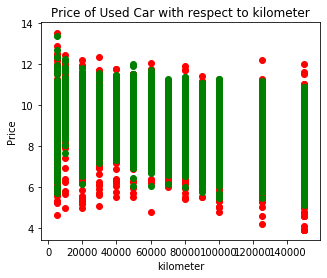

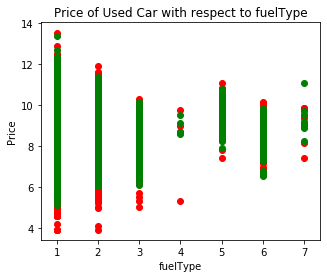

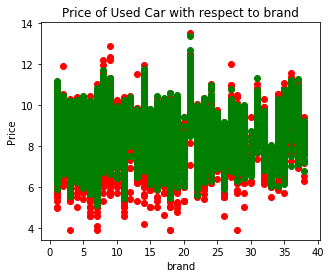

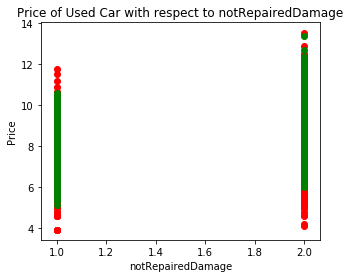

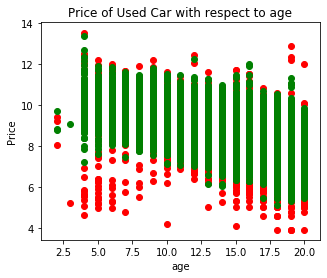

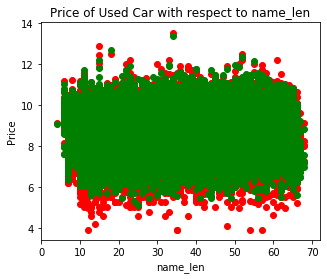

In [71]:
# plotting the predicted values vs actual values with respect to 
# different features in test dataset
for i in X_train.columns:
    plt.figure(figsize= (5, 4))
    plt.scatter(X_test[i], Y_test, color = "red")
    plt.scatter(X_test[i], gs_cv.predict(X_test), color = "green")
    plt.title("Price of Used Car with respect to " + i)
    plt.xlabel(i)
    plt.ylabel("Price")
    plt.show()

In [72]:
# dump the pickle file so as to load the model later on.
jl.dump(gs_cv.best_estimator_, 'model_hist_gbr.pkl')

['model_hist_gbr.pkl']

### Transformation / Predictor Function

In order to predict from actual data, we have to create a transformation function that can be used to transform raw data so that it can be consumed by the model.

The transformation function can be built using the variables already created in this notebook.

The steps include:


* Remove features not included while training the model
* Convert categorical values into numerical values as was done during data preparation





In [73]:
def transformation(data):
    data["powerPS"] = data["powerPS"].astype(int)
    data["kilometer"] = data["kilometer"].astype(int)
    data["yearOfRegistration"] = data["yearOfRegistration"].astype(int)
    data["monthOfRegistration"] = data["monthOfRegistration"].astype(int)
    data['age'] = age_calculator(data)
    data['name_len'] = data['name'].str.len()
    data.drop(['dateCrawled',
               'name',
               'seller',
               'offerType',
               'abtest',
               'nrOfPictures',
               'lastSeen',
               'dateCreated',
               'postalCode',
               'yearOfRegistration',
               'monthOfRegistration',
               'dateOfRegistration'], axis='columns', inplace=True)
    data["fuelType"].replace(auto_df_fuelType_dic, inplace=True)
    data["gearbox"].replace({"manuell": 1, "automatik": 2}, inplace=True)
    data["notRepairedDamage"].replace({"ja": 1, "nein": 2}, inplace=True)
    data["brand"].replace(auto_df_brand_dic, inplace=True)
    data["model"].replace(auto_df_models_dic, inplace=True)
    data["vehicleType"].replace(auto_vehicleType_dic, inplace=True)

In [74]:
def predictor(data):
    transformation(data)
    model = jl.load('model_hist_gbr.pkl')
    price = model.predict(data)
    price = np.expm1(price)
    return price

In [75]:
auto_df_test = pd.read_csv("autos.csv")
# The max yearOfRegistration should be current year
auto_df_test = auto_df_test.where((auto_df_test['yearOfRegistration'] > 1999) & 
                        (auto_df_test['yearOfRegistration'] < 2020) & 
                        (auto_df_test['price'] > 20)).dropna().sample(n=20)
predicted_price = predictor(auto_df_test.drop(['price'], axis='columns'))
print(predicted_price)

[ 2742.51198272  2205.9603108    967.82037556  7608.01180722
   607.5140409   3306.12156272  5903.69776322  2601.89453501
  4281.0274854   4350.98558509  2669.41662038  7871.27282497
 22052.00349855  1595.8696043   5590.36358824  6042.4157903
  6562.59157563 16920.81040902  2944.98067468 17001.21655351]


## Conclusion

* For this dataset, the features affecting the price are:
	**powerPS, age, kilometer, gearbox, vehicleType, name_len, notRepairedDamage, fuelType, brand** and **model**.
* Linear Regression allowed me to identify the features that have some impact on the price of the used car.
	It served as a base model against which I compared the other algorithms.
* Using KFold Cross-Validation, **HistGradientBoostingRegressor** seems better performing algorithm for this problem.
* Further tuning of HistGradientBoostingRegressor using GridSearchCV led to a model with improved R2_Score on test data and better price predictions of Used Cars.

## References

* HistGradientBoostingRegressor
https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.HistGradientBoostingRegressor.html

* Used Car Database:https://www.kaggle.com/orgesleka/used-cars-database

* K-Fold Cross-Validation:
https://machinelearningmastery.com/k-fold-cross-validation/

* GridSearchCV:
https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html
